# Exercise 2: Morphological Transformations

In this exercise you will:
- Learn different morphological operations such as Erosion, Dilation, Opening and Closing.
- Use the OpenCV functions `cv.erode()`, `cv.dilate()` and `cv.morphologyEx()`.

As a first step, let's import the python modules we need.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Morphological Transformations

https://docs.opencv.org/4.5.1/d9/d61/tutorial_py_morphological_ops.html  
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

Morphological transformations are simple window-based operations on images, and are usually performed on **binary images** (e.g. after binary thresholding the image). Morphological transformations needs two inputs:
- The original image.
- A *structuring element* or *kernel* that decides the nature of the operation.

The two basic morphological operators are **Erosion** and **Dilation**, from which various other operators can be derived, such as *Opening*, *Closing*, etc.

We will use the two images below to illustrate the effects of various morphological transformations. Note that the images have already been binary thresholded, i.e. the only two values a pixel can have is 0 (black) or 255 (white).

<img width="100" height="150" src="../notebook_images/j.png">
<img width="200" height="150" src="../notebook_images/morphology.png" style="padding-left: 20px">

### 1. Erosion

The basic idea of erosion is to erode the boundaries of foreground objects (where foreground objects are assumed to be white, i.e. with pixel values 255).

A kernel, e.g. a 5x5 kernel with all pixels set to 1 (i.e. the mask value), slides over the image (as in 2D convolution), where a pixel in the original image, either 0 (black) or white (255), will be kept white (255) only if **all the pixels** under the kernel (kernel mask) are white (255), otherwise the pixel is eroded, i.e. set to black (0).

The effect of erosion is, thus, that all pixels near a boundary will be discarded, depending on the size and shape of the kernel. Therefore, the size (or thickness) of foreground objects will decrease slightly (i.e the white regions in the image will shrink).

Erosion is useful for removing small white noises, stripping away extrusions, splitting up two connected objects, etc.

OpenCV provides the function [cv.erode()](https://docs.opencv.org/4.5.1/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb) for apply erosion to an image.

`cv.erode(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> dst`
- `src` is the source (input) image.
- `kernel` is the structuring element (kernel) used for the erosion (e.g. 5x5 all ones).
- `anchor` is the anchor position within the element (default = (-1,-1) i.e. element center).
- `iterations` is the number of times erosion is applied.
- `borderType` is the pixel extrapolation method, e.g. `cv.BORDER_CONSTANT`.
- `borderValue` is the border value used when `borderType` is `cv.BORDER_CONSTANT`.

The eroded image will be returned in `dst` (same size as `src`).

Let's see how this works using a 5x5 kernel of ones for the first image (with the letter "j") and a 3x3 kernel of ones for the second image.

The unique values in image 1 are: [  0 255]
The unique values in image 2 are: [  0 255]


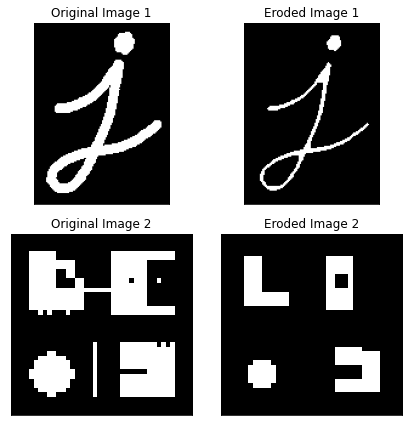

In [2]:
# Read in two images as grayscale
img1 = cv.imread('../data/j.png', 0)
img2 = cv.imread('../data/morphology.png', 0)

# Print the unique values in the images. This is just to show
# that they are binary images, with pixel values 0 (black) or
# 255 (white). For any other image, we would need to turn  it
# in to a binary image for best results.
print(f'The unique values in image 1 are: {np.unique(img1)}')
print(f'The unique values in image 2 are: {np.unique(img2)}')

# Create a 5x5 and a 3x3 kernel of ones. We will use the 5x5 kernel
# for img1 (with the letter "j") and the 3x3 kernel for img2.
kernel_5x5 = np.ones((5,5), np.uint8)
kernel_3x3 = np.ones((3,3), np.uint8)

# Apply erosion to the images, using the 5x5 kernel for
# img1 (with the letter "j") and the 3x3 kernel for img2.
img1_eroded = cv.erode(img1, kernel_5x5, iterations = 1)
img2_eroded = cv.erode(img2, kernel_3x3, iterations = 1)

# Plot the original image and the eroded images
plt.figure(figsize=(6,6))

plt.subplot(221), plt.imshow(img1, cmap="gray")
plt.title('Original Image 1'), plt.xticks([]), plt.yticks([])

plt.subplot(222), plt.imshow(img1_eroded, cmap="gray")
plt.title('Eroded Image 1'), plt.xticks([]), plt.yticks([])

plt.subplot(223), plt.imshow(img2, cmap="gray")
plt.title('Original Image 2'), plt.xticks([]), plt.yticks([])

plt.subplot(224), plt.imshow(img2_eroded, cmap="gray")
plt.title('Eroded Image 2'), plt.xticks([]), plt.yticks([])

plt.tight_layout(pad=1.0)
plt.show()

### 2. Dilation

Dilation is the opposite of erosion. Here, a foreground pixels value will be kept white (255) if **at least one** pixel under the kernel (kernel mask) is white (255).

The effect of dilation is, thus, that the size (or thickness) of foreground objects will increase slightly (i.e the white regions in the image will grow).

Dilation is useful in joining broken parts of a foreground object, and filling in "holes" in foreground objects.

OpenCV provides the function [cv.dilate()](https://docs.opencv.org/4.5.1/d4/d86/group__imgproc__filter.html#ga4ff0f3318642c4f469d0e11f242f3b6c) for apply dilation to an image.

`cv.dilate(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> dst`
- It has exactly the same parameters are the `cv.erode()` function above.

Let's see how this works using a 5x5 kernel of ones for the first image (with the letter "j") and a 3x3 kernel of ones for the second image.

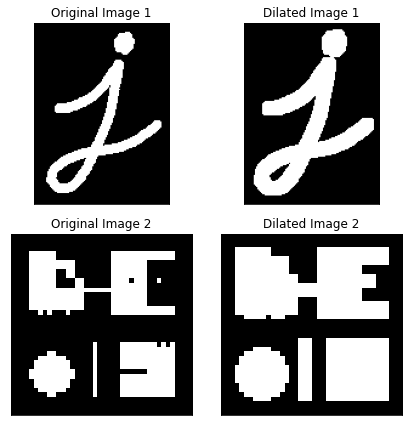

In [3]:
# Read in two images as grayscale
img1 = cv.imread('../data/j.png', 0)
img2 = cv.imread('../data/morphology.png', 0)

# Create a 5x5 and a 3x3 kernel of ones.
kernel_5x5 = np.ones((5,5), np.uint8)
kernel_3x3 = np.ones((3,3), np.uint8)

# Apply dilusion to the images, using the 5x5 kernel for
# img1 (with the letter "j") and the 3x3 kernel for img2.
img1_dilated = cv.dilate(img1, kernel_5x5, iterations = 1)
img2_dilated = cv.dilate(img2, kernel_3x3, iterations = 1)

# Plot the original image and the dilated images
plt.figure(figsize=(6,6))

plt.subplot(221), plt.imshow(img1, cmap="gray")
plt.title('Original Image 1'), plt.xticks([]), plt.yticks([])

plt.subplot(222), plt.imshow(img1_dilated, cmap="gray")
plt.title('Dilated Image 1'), plt.xticks([]), plt.yticks([])

plt.subplot(223), plt.imshow(img2, cmap="gray")
plt.title('Original Image 2'), plt.xticks([]), plt.yticks([])

plt.subplot(224), plt.imshow(img2_dilated, cmap="gray")
plt.title('Dilated Image 2'), plt.xticks([]), plt.yticks([])

plt.tight_layout(pad=1.0)
plt.show()

### 3. Opening

Opening is just another name of erosion followed by dilation.

Opening is useful in removing noise. Normally, when removing noise from an image, erosion would be applied, followed by dilation. Erosion removes white noise, but it also shrinks foreground objects. Therefore, dilation is applied after erosion to grow the foreground objects back to their original size again, but since erosion has effectively removed noise, the noise won't come back again during dilation. Opening generally smoothes the contour of an object, breaks narrow bands between objects, and eliminates thin protrusions.

We can use the `cv.erode()` function, followed by the `cv.dilate()` function, to apply opening to an image, but OpenCV also provides the function [cv.morphologyEx()](https://docs.opencv.org/4.5.1/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f).

`morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) -> dst`

It has the same parameters as `cv.erode()` and `cv.dilate()`, with an additional parameter `op`, which determines which [morphological operation](https://docs.opencv.org/4.5.1/d4/d86/group__imgproc__filter.html#ga7be549266bad7b2e6a04db49827f9f32) to perform:
- `cv.MORPH_ERODE` applies an erosion to an image, i.e. `cv.erode(src,kernel)`.
- `cv.MORPH_DILATE` applies a dilation to an image, i.e. `cv.dilate(src,kernel)`.
- `cv.MORPH_OPEN` applies an opening to an image, i.e. `dilate(erode(src,kernel))`.
- `cv.MORPH_CLOSE` applies a closing to an image, i.e. `erode(dilate(src,kernel))`.
- `cv.MORPH_GRADIENT` computes image gradients, i.e. `dilate(src,kernel) − erode(src,kernel)`.
- `cv.MORPH_TOPHAT` applies a tophat to an image, i.e. `src − open(src,kernel)`.
- `cv.MORPH_BLACKHAT` applies a blackhat to an image, i.e. `close(src,kernel) − src`.
- `cv.MORPH_HITMISS` applies a hit-and-miss to an image, i.e. ``.

Let's look at an example.

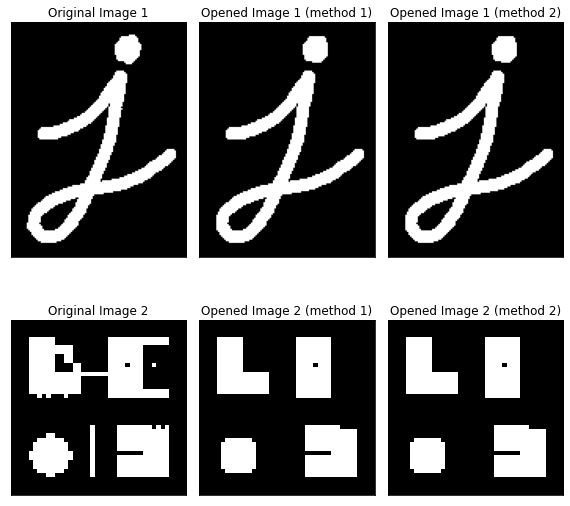

In [4]:
# Read in two images as grayscale
img1 = cv.imread('../data/j.png', 0)
img2 = cv.imread('../data/morphology.png', 0)

# Create a 5x5 and a 3x3 kernel of ones.
kernel_5x5 = np.ones((5,5), np.uint8)
kernel_3x3 = np.ones((3,3), np.uint8)

# "Open" the two images, i.e., erode then dilute.
img1_eroded = cv.erode(img1, kernel_5x5, iterations = 1)
img1_opened_1 = cv.dilate(img1_eroded, kernel_5x5, iterations = 1)
img2_eroded = cv.erode(img2, kernel_3x3, iterations = 1)
img2_opened_1 = cv.dilate(img2_eroded, kernel_3x3, iterations = 1)

# "Open" the two images using the 'cv.morphologyEx' function.
img1_opened_2 = cv.morphologyEx(img1, cv.MORPH_OPEN, kernel_5x5)
img2_opened_2 = cv.morphologyEx(img2, cv.MORPH_OPEN, kernel_3x3)

# Plot the original image and the opened images
plt.figure(figsize=(8,8))

plt.subplot(231), plt.imshow(img1, cmap="gray")
plt.title('Original Image 1'), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(img1_opened_1, cmap="gray")
plt.title('Opened Image 1 (method 1)'), plt.xticks([]), plt.yticks([])

plt.subplot(233), plt.imshow(img1_opened_2, cmap="gray")
plt.title('Opened Image 1 (method 2)'), plt.xticks([]), plt.yticks([])

plt.subplot(234), plt.imshow(img2, cmap="gray")
plt.title('Original Image 2'), plt.xticks([]), plt.yticks([])

plt.subplot(235), plt.imshow(img2_opened_1, cmap="gray")
plt.title('Opened Image 2 (method 1)'), plt.xticks([]), plt.yticks([])

plt.subplot(236), plt.imshow(img2_opened_2, cmap="gray")
plt.title('Opened Image 2 (method 2)'), plt.xticks([]), plt.yticks([])

plt.tight_layout(pad=1.0)
plt.show()

### 4. Closing

Closing is the reverse of Opening, i.e. Dilation followed by Erosion. It is useful in closing small holes inside foreground objects, or small black points on the object. It generally fuses narrow breaks and long, thin gulfs, eliminates small holes, and fills gaps in the contour.

We can close an image in two different ways:
- `img_closed = cv.erode(cv.dilate(img, kernel), img, kernel)`
- `img_closed = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)`

Let's look at an example.

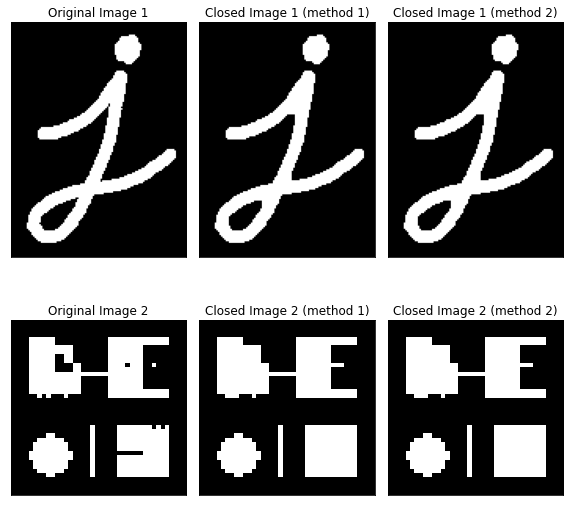

In [5]:
# Read in two images as grayscale
img1 = cv.imread('../data/j.png', 0)
img2 = cv.imread('../data/morphology.png', 0)

# Create a 5x5 and a 3x3 kernel of ones.
kernel_5x5 = np.ones((5,5), np.uint8)
kernel_3x3 = np.ones((3,3), np.uint8)

# "Close" the two images, i.e., dilate then erode.
img1_dilated = cv.dilate(img1, kernel_5x5, iterations = 1)
img1_closed_1 = cv.erode(img1_dilated, kernel_5x5, iterations = 1)
img2_dilated = cv.dilate(img2, kernel_3x3, iterations = 1)
img2_closed_1 = cv.erode(img2_dilated, kernel_3x3, iterations = 1)

# "Close" the two images using the 'cv.morphologyEx' function.
img1_closed_2 = cv.morphologyEx(img1, cv.MORPH_CLOSE, kernel_5x5)
img2_closed_2 = cv.morphologyEx(img2, cv.MORPH_CLOSE, kernel_3x3)

# Plot the original image and the closed images
plt.figure(figsize=(8,8))

plt.subplot(231), plt.imshow(img1, cmap="gray")
plt.title('Original Image 1'), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(img1_closed_1, cmap="gray")
plt.title('Closed Image 1 (method 1)'), plt.xticks([]), plt.yticks([])

plt.subplot(233), plt.imshow(img1_closed_2, cmap="gray")
plt.title('Closed Image 1 (method 2)'), plt.xticks([]), plt.yticks([])

plt.subplot(234), plt.imshow(img2, cmap="gray")
plt.title('Original Image 2'), plt.xticks([]), plt.yticks([])

plt.subplot(235), plt.imshow(img2_closed_1, cmap="gray")
plt.title('Closed Image 2 (method 1)'), plt.xticks([]), plt.yticks([])

plt.subplot(236), plt.imshow(img2_closed_2, cmap="gray")
plt.title('Closed Image 2 (method 2)'), plt.xticks([]), plt.yticks([])

plt.tight_layout(pad=1.0)
plt.show()

### 5. Morphological Gradient

The morphological gradient is simply the difference between the dilation and the erosion of an image. The result will look like the outline of the object.

We can compute the morphological gradient in two different ways:
- `img_morph_grad = cv.dilate(img, kernel) - cv.erode(img, kernel)`
- `img_morph_grad = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)`

Let's look at an example.

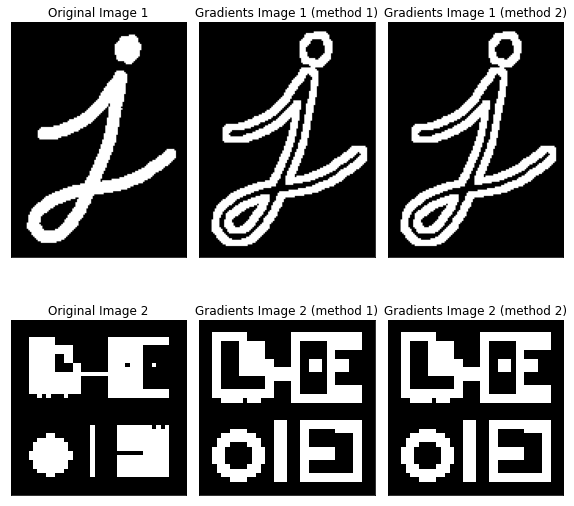

In [6]:
# Read in two images as grayscale
img1 = cv.imread('../data/j.png', 0)
img2 = cv.imread('../data/morphology.png', 0)

# Create a 5x5 and a 3x3 kernel of ones.
kernel_5x5 = np.ones((5,5), np.uint8)
kernel_3x3 = np.ones((3,3), np.uint8)

# Compute the morphological gradients, i.e. dilate - erode.
img1_dilated = cv.dilate(img1, kernel_5x5, iterations = 1)
img1_eroded = cv.erode(img1, kernel_5x5, iterations = 1)
img1_morph_grad_1 = img1_dilated - img1_eroded
img2_dilated = cv.dilate(img2, kernel_3x3, iterations = 1)
img2_eroded = cv.erode(img2, kernel_3x3, iterations = 1)
img2_morph_grad_1 = img2_dilated - img2_eroded

# Compute the morphological gradients using the 'cv.morphologyEx' function.
img1_morph_grad_2 = cv.morphologyEx(img1, cv.MORPH_GRADIENT, kernel_5x5)
img2_morph_grad_2 = cv.morphologyEx(img2, cv.MORPH_GRADIENT, kernel_3x3)

# Plot the original image and the gradients
plt.figure(figsize=(8,8))

plt.subplot(231), plt.imshow(img1, cmap="gray")
plt.title('Original Image 1'), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(img1_morph_grad_1, cmap="gray")
plt.title('Gradients Image 1 (method 1)'), plt.xticks([]), plt.yticks([])

plt.subplot(233), plt.imshow(img1_morph_grad_2, cmap="gray")
plt.title('Gradients Image 1 (method 2)'), plt.xticks([]), plt.yticks([])

plt.subplot(234), plt.imshow(img2, cmap="gray")
plt.title('Original Image 2'), plt.xticks([]), plt.yticks([])

plt.subplot(235), plt.imshow(img2_morph_grad_1, cmap="gray")
plt.title('Gradients Image 2 (method 1)'), plt.xticks([]), plt.yticks([])

plt.subplot(236), plt.imshow(img2_morph_grad_2, cmap="gray")
plt.title('Gradients Image 2 (method 2)'), plt.xticks([]), plt.yticks([])

plt.tight_layout(pad=1.0)
plt.show()

### 6. Top Hat

The *Top Hat* is the difference between the image and the opening of the image. It is commonly used to isolate patches that are brighter than their immediate neighbours.

We can compute the Top Hat in two different ways:
- `img_top_hat = img - cv.dilate(cv.erode(img, kernel), img, kernel)`
- `img_top_hat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)`

Let's look at an example.

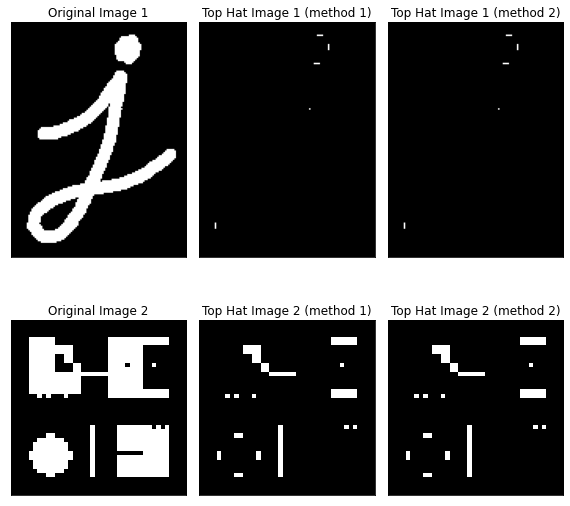

In [7]:
# Read in two images as grayscale
img1 = cv.imread('../data/j.png', 0)
img2 = cv.imread('../data/morphology.png', 0)

# Create a 5x5 and a 3x3 kernel of ones.
kernel_5x5 = np.ones((5,5), np.uint8)
kernel_3x3 = np.ones((3,3), np.uint8)

# Compute the Top Hat, i.e. image - opening.
img1_eroded = cv.erode(img1, kernel_5x5, iterations = 1)
img1_opened = cv.dilate(img1_eroded, kernel_5x5, iterations = 1)
img1_top_hat_1 = img1 - img1_opened
img2_eroded = cv.erode(img2, kernel_3x3, iterations = 1)
img2_opened = cv.dilate(img2_eroded, kernel_3x3, iterations = 1)
img2_top_hat_1 = img2 - img2_opened

# Compute the Top Hat using the 'cv.morphologyEx' function.
img1_top_hat_2 = cv.morphologyEx(img1, cv.MORPH_TOPHAT, kernel_5x5)
img2_top_hat_2 = cv.morphologyEx(img2, cv.MORPH_TOPHAT, kernel_3x3)

# Plot the original image and the Top Hats
plt.figure(figsize=(8,8))

plt.subplot(231), plt.imshow(img1, cmap="gray")
plt.title('Original Image 1'), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(img1_top_hat_1, cmap="gray")
plt.title('Top Hat Image 1 (method 1)'), plt.xticks([]), plt.yticks([])

plt.subplot(233), plt.imshow(img1_top_hat_2, cmap="gray")
plt.title('Top Hat Image 1 (method 2)'), plt.xticks([]), plt.yticks([])

plt.subplot(234), plt.imshow(img2, cmap="gray")
plt.title('Original Image 2'), plt.xticks([]), plt.yticks([])

plt.subplot(235), plt.imshow(img2_top_hat_1, cmap="gray")
plt.title('Top Hat Image 2 (method 1)'), plt.xticks([]), plt.yticks([])

plt.subplot(236), plt.imshow(img2_top_hat_2, cmap="gray")
plt.title('Top Hat Image 2 (method 2)'), plt.xticks([]), plt.yticks([])

plt.tight_layout(pad=1.0)
plt.show()

### 7. Black Hat

The "Black Hat" is the difference between the closing of an image and the image. It is commonly used to isolate patches that are darker than their immediate neighbours.

We can compute the Black Hat in two different ways:
- `img_black_hat = cv.erode(cv.dilate(img, kernel), img, kernel) - img`
- `img_black_hat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)`

Let's look at an example.

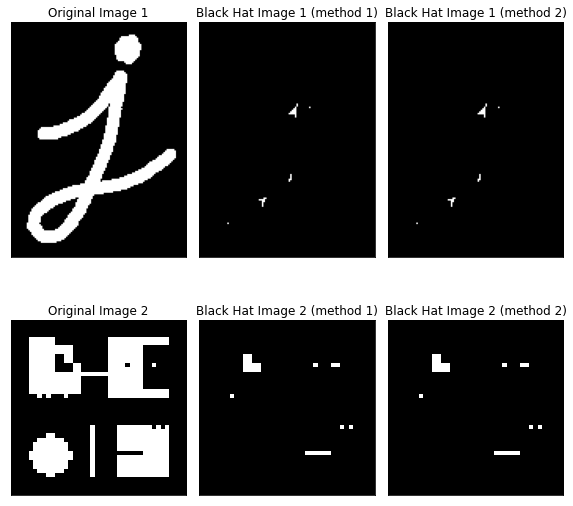

In [8]:
# Read in two images as grayscale
img1 = cv.imread('../data/j.png', 0)
img2 = cv.imread('../data/morphology.png', 0)

# Create a 5x5 and a 3x3 kernel of ones.
kernel_5x5 = np.ones((5,5), np.uint8)
kernel_3x3 = np.ones((3,3), np.uint8)

# Compute the Black Hat, i.e. closing - image.
img1_dilated = cv.dilate(img1, kernel_5x5, iterations = 1)
img1_closed = cv.erode(img1_dilated, kernel_5x5, iterations = 1)
img1_black_hat_1 = img1_closed - img1
img2_dilated = cv.dilate(img2, kernel_3x3, iterations = 1)
img2_closed = cv.erode(img2_dilated, kernel_3x3, iterations = 1)
img2_black_hat_1 = img2_closed - img2

# Compute the Black Hat using the 'cv.morphologyEx' function.
img1_black_hat_2 = cv.morphologyEx(img1, cv.MORPH_BLACKHAT, kernel_5x5)
img2_black_hat_2 = cv.morphologyEx(img2, cv.MORPH_BLACKHAT, kernel_3x3)

# Plot the original image and the Black Hats
plt.figure(figsize=(8,8))

plt.subplot(231), plt.imshow(img1, cmap="gray")
plt.title('Original Image 1'), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(img1_black_hat_1, cmap="gray")
plt.title('Black Hat Image 1 (method 1)'), plt.xticks([]), plt.yticks([])

plt.subplot(233), plt.imshow(img1_black_hat_2, cmap="gray")
plt.title('Black Hat Image 1 (method 2)'), plt.xticks([]), plt.yticks([])

plt.subplot(234), plt.imshow(img2, cmap="gray")
plt.title('Original Image 2'), plt.xticks([]), plt.yticks([])

plt.subplot(235), plt.imshow(img2_black_hat_1, cmap="gray")
plt.title('Black Hat Image 2 (method 1)'), plt.xticks([]), plt.yticks([])

plt.subplot(236), plt.imshow(img2_black_hat_2, cmap="gray")
plt.title('Black Hat Image 2 (method 2)'), plt.xticks([]), plt.yticks([])

plt.tight_layout(pad=1.0)
plt.show()

### 8. Hit and Miss

https://docs.opencv.org/master/db/d06/tutorial_hitOrMiss.html

The Hit-and-Miss transformation is useful to find patterns in binary images. In particular, it finds those pixels whose neighbourhood matches the shape of a first structuring element (kernel) $K_1$ while not matching the shape of a second structuring element (kernel) $K_2$ at the same time. Mathematically, the operation applied to an image $I$ can be expressed as below (where $\circledast$ is the convolution operator, $K$ is the two kernels $K_1$ and $K_2$ combined, and $I^c$ is the complement of image $I$):

$$
I \circledast K = (I \circledast K_1) \cap (I^c \circledast K_2)
$$

Therefore, the hit-or-miss operation comprises three steps:

1. Erode image $I$ with structuring element (kernel) $K_1$.
2. Erode $I^c$ (the complement of image $I$) with structuring element (kernel) $K_2$.
3. AND the results from step 1 and step 2 with each other.

To calculate the complement of a binary image $I^c$, a pixel with the "on" value, i.e. white (255) (or perhaps 1), is changed to the "off" value, i.e. black (0). Likewise, a pixel with the "off" value black (0) is set to the "on" value white (255) (or perhaps 1). For example, $255^c = 0$ and $0^c = 255$ for a binary image with the values 255 and 0, or $1^c = 0$ and $0^c = 1$ for a binary image with the values 1 and 0. For grayscale or color images, the complement of a pixel value is simply the maximum possible pixel value minus the actual pixel value (assuming positive pixel values), e.g. $123^c = 255 - 123 = 132$ for an 8-bit grayscale image.

<img src="../notebook_images/hitmiss_kernels.png" style="padding-left: 10px; float: right;">

The structuring elements (kernels) $K_1$ and $K_2$ can be combined into a single element (kernel) $K$. In the figure to the right, $K_1$ is to the left, $K_2$ is in the middle, and $K$ is to the right. Since $K_2$ is really applied to $I^c$, its "on" pixels are represented as $-1$ in the combined kernel $K$.

In this case, $K_1$ is looking for a center pixel that is "off", i.e. black (0), but with the neighbouring pixels in the North, East, South and West directions "on", i.e. white (255). $K_2$ is looking for a center pixel that is "on", i.e. white (255). If both these conditions hold simultaneously, the center pixel is set to "on", i.e. white (255).

If we apply this kernel $K$ (or kernels $K_1$ and $K_2$) to the left image below, we would get the image to the right below as the output from the hit-and-miss operator.

<img width="200" height="200" src="../notebook_images/hitmiss_input.png">
<img width="200" height="200" src="../notebook_images/hitmiss_output.png">

Below are two more exmples with different combined kernels ($K$) and associated output images.

<img width="300" height="200" src="../notebook_images/hitmiss_example2.png">
<img width="300" height="200" src="../notebook_images/hitmiss_example3.png">

We can compute Hit-and-Miss in two different ways:
- `img_hit_miss = cv.erode(img, kernel_1) AND cv.erode(img_complement, kernel_2)`
- `img_hit_miss = cv.morphologyEx(img, cv.MORPH_HITMISS, combined_kernel)`

Let's look at an example using the kernels $K_1$, $K_2$ and $K$.

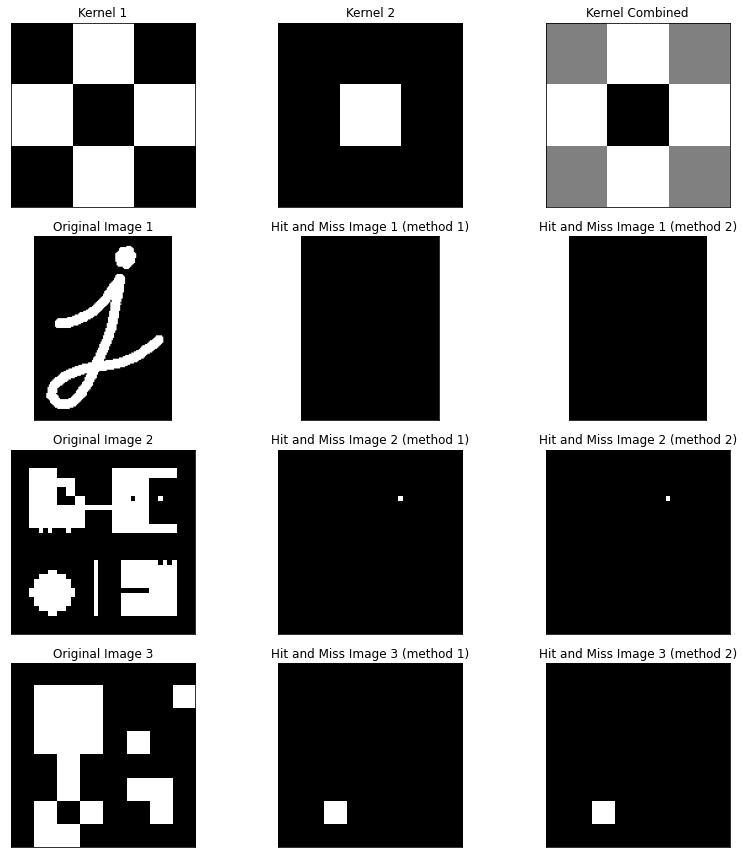

In [9]:
# Read in two images as grayscale
img1 = cv.imread('../data/j.png', 0)
img2 = cv.imread('../data/morphology.png', 0)

# Let's also create the image from
# the example in the text above
img3 = np.array([
    [  0,   0,   0,   0,   0,   0,   0,   0],
    [  0, 255, 255, 255,   0,   0,   0, 255],
    [  0, 255, 255, 255,   0,   0,   0,   0],
    [  0, 255, 255, 255,   0, 255,   0,   0],
    [  0,   0, 255,   0,   0,   0,   0,   0],
    [  0,   0, 255,   0,   0, 255, 255,   0],
    [  0, 255,   0, 255,   0,   0, 255,   0],
    [  0, 255, 255,   0,   0,   0,   0,   0]
], dtype=np.uint8)

# Compute the complement images
img1_complement = img1.max() - img1
img2_complement = img2.max() - img2
img3_complement = img3.max() - img3

# Create a 3x3 kernel K_1, K_2 and K
kernel_1 = np.array([
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0]
], np.uint8)

kernel_2 = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
], np.uint8)

# Note, here we need 'np.int32'
kernel_combined = np.array([
    [0, 1, 0],
    [1,-1, 1],
    [0, 1, 0]
], np.int32)

# Compute the Hit and Miss manually.
img1_eroded = cv.erode(img1, kernel_1, iterations = 1)
img1_complement_eroded = cv.erode(img1_complement, kernel_2, iterations = 1)
img1_hit_miss_1 = cv.bitwise_and(img1_eroded, img1_complement_eroded)
img2_eroded = cv.erode(img2, kernel_1, iterations = 1)
img2_complement_eroded = cv.erode(img2_complement, kernel_2, iterations = 1)
img2_hit_miss_1 = cv.bitwise_and(img2_eroded, img2_complement_eroded)
img3_eroded = cv.erode(img3, kernel_1, iterations = 1)
img3_complement_eroded = cv.erode(img3_complement, kernel_2, iterations = 1)
img3_hit_miss_1 = cv.bitwise_and(img3_eroded, img3_complement_eroded)

# Compute the Hit and Miss using the 'cv.morphologyEx' function.
img1_hit_miss_2 = cv.morphologyEx(img1, cv.MORPH_HITMISS, kernel_combined)
img2_hit_miss_2 = cv.morphologyEx(img2, cv.MORPH_HITMISS, kernel_combined)
img3_hit_miss_2 = cv.morphologyEx(img3, cv.MORPH_HITMISS, kernel_combined)

# Plot the kernels, original images and the Hit and Miss results
plt.figure(figsize=(12,12))

plt.subplot(431), plt.imshow(kernel_1, cmap="gray")
plt.title('Kernel 1'), plt.xticks([]), plt.yticks([])

plt.subplot(432), plt.imshow(kernel_2, cmap="gray")
plt.title('Kernel 2'), plt.xticks([]), plt.yticks([])

plt.subplot(433), plt.imshow(kernel_combined, cmap="gray")
plt.title('Kernel Combined'), plt.xticks([]), plt.yticks([])

plt.subplot(434), plt.imshow(img1, cmap="gray")
plt.title('Original Image 1'), plt.xticks([]), plt.yticks([])

plt.subplot(435), plt.imshow(img1_hit_miss_1, cmap="gray")
plt.title('Hit and Miss Image 1 (method 1)'), plt.xticks([]), plt.yticks([])

plt.subplot(436), plt.imshow(img1_hit_miss_2, cmap="gray")
plt.title('Hit and Miss Image 1 (method 2)'), plt.xticks([]), plt.yticks([])

plt.subplot(437), plt.imshow(img2, cmap="gray")
plt.title('Original Image 2'), plt.xticks([]), plt.yticks([])

plt.subplot(438), plt.imshow(img2_hit_miss_1, cmap="gray")
plt.title('Hit and Miss Image 2 (method 1)'), plt.xticks([]), plt.yticks([])

plt.subplot(439), plt.imshow(img2_hit_miss_2, cmap="gray")
plt.title('Hit and Miss Image 2 (method 2)'), plt.xticks([]), plt.yticks([])

plt.subplot(4,3,10), plt.imshow(img3, cmap="gray")
plt.title('Original Image 3'), plt.xticks([]), plt.yticks([])

plt.subplot(4,3,11), plt.imshow(img3_hit_miss_1, cmap="gray")
plt.title('Hit and Miss Image 3 (method 1)'), plt.xticks([]), plt.yticks([])

plt.subplot(4,3,12), plt.imshow(img3_hit_miss_2, cmap="gray")
plt.title('Hit and Miss Image 3 (method 2)'), plt.xticks([]), plt.yticks([])

plt.tight_layout(pad=1.0)
plt.show()

### Structuring Element (Kernel)

We manually created our structuring elements (kernels) in the previous examples, using Numpy, which was easy for a rectangular kernel. In some cases, we may need elliptical,  circular or cross shaped kernels, which take longer to create manually. Therefore, OpenCV provides the function [cv.getStructuringElement()](https://docs.opencv.org/4.5.1/d4/d86/group__imgproc__filter.html#gac342a1bb6eabf6f55c803b09268e36dc).

`cv.getStructuringElement(shape, ksize[, anchor]) -> retval`
- `shape` is the desired [kernel shape](https://docs.opencv.org/4.5.1/d4/d86/group__imgproc__filter.html#gac2db39b56866583a95a5680313c314ad), e.g. `cv.MORPH_RECT`, `MORPH_ELLIPSE`, `MORPH_CROSS`.
- `ksize` is the kernel size, e.g. `(5,5,)`.
- `anchor` is the anchor position within the kernel (default = (-1,-1) i.e. center point).

The function returns the kernel in `retval`.

Let's look at a few examples.

morph_rect_5x5:

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]

morph_ellise_5x5:

[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]

morph_cross_5x5:

[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]




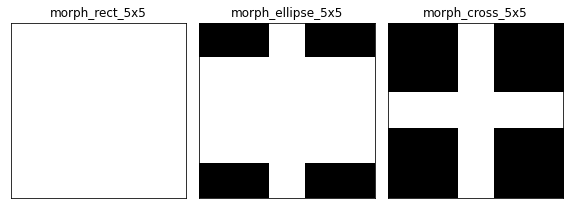

In [10]:
# Rectangular Kernel
morph_rect_5x5 = cv.getStructuringElement(cv.MORPH_RECT, (5,5))
print(f'morph_rect_5x5:\n\n{morph_rect_5x5}')

# Elliptical Kernel
morph_ellipse_5x5 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))
print(f'\nmorph_ellise_5x5:\n\n{morph_ellipse_5x5}')

# Cross-shaped Kernel
morph_cross_5x5 = cv.getStructuringElement(cv.MORPH_CROSS, (5,5))
print(f'\nmorph_cross_5x5:\n\n{morph_cross_5x5}\n\n')

# Plot the kernels
plt.figure(figsize=(8,8))

plt.subplot(131), plt.imshow(morph_rect_5x5*255, cmap="gray", vmin=0, vmax=255),
plt.title('morph_rect_5x5'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(morph_ellipse_5x5*255, cmap="gray"),
plt.title('morph_ellipse_5x5'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(morph_cross_5x5*255, cmap="gray"),
plt.title('morph_cross_5x5'), plt.xticks([]), plt.yticks([])

plt.tight_layout(pad=1.0)
plt.show()
